<a href="https://colab.research.google.com/github/ruan-narici/brazilian-ecommerce-analytics/blob/main/brazilian_ecommerce_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Projeto: Análise de Vendas e Entregas no E-commerce Brasileiro

### Imports

In [367]:
import pandas as pd

### Load datasets

In [368]:
df_customers = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_customers_dataset.csv") #OK
# df_geolocation = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_geolocation_dataset.csv") #EXCLUDE
df_order_items = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_order_items_dataset.csv") #OK
df_order_payments = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_order_payments_dataset.csv") #OK
df_order_reviews = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_order_reviews_dataset.csv") #OK
df_orders = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_orders_dataset.csv") #OK
df_products = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_products_dataset.csv") #OK
df_sellers = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_sellers_dataset.csv") #OK
df_product_category_name_translation = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/product_category_name_translation.csv") #OK

### Define Types

In [369]:
# DateTimeType
df_order_items["shipping_limit_date"] = pd.to_datetime(df_order_items["shipping_limit_date"])
df_order_reviews["review_creation_date"] = pd.to_datetime(df_order_reviews["review_creation_date"])
df_order_reviews["review_answer_timestamp"] = pd.to_datetime(df_order_reviews["review_answer_timestamp"])
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"])
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"])
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"])

### Merge datasets

In [370]:
df_merged = df_orders.merge(df_order_items, on="order_id")
df_merged = df_merged.merge(df_customers, on="customer_id")
df_merged = df_merged.merge(df_sellers, on="seller_id")
df_merged = df_merged.merge(df_products, on="product_id")
df_merged = df_merged.merge(df_order_payments, on="order_id")
df_merged = df_merged.merge(df_product_category_name_translation, on="product_category_name")
df_merged = df_merged.merge(df_order_reviews, on="order_id")

df_merged.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name_english', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

### Handling null values

In [371]:
# DateTimeType
# df_merged["order_approved_at"] = df_merged["order_approved_at"].fillna('1900-01-01')
# df_merged["order_delivered_carrier_date"] = df_merged["order_delivered_carrier_date"].fillna('1900-01-01')
# df_merged["order_delivered_customer_date"] = df_merged["order_delivered_customer_date"].fillna('1900-01-01')

# FloatType
df_merged["product_weight_g"] = df_merged["product_weight_g"].fillna('-2')
df_merged["product_length_cm"] = df_merged["product_length_cm"].fillna('-2')
df_merged["product_height_cm"] = df_merged["product_height_cm"].fillna('-2')
df_merged["product_width_cm"] = df_merged["product_width_cm"].fillna('-2')
df_merged["review_comment_message"] = df_merged["product_width_cm"].fillna('-2')

# StrType
df_merged["review_comment_title"] = df_merged["review_comment_title"].fillna('-2')


# DropNa
## If product does not have the filled fields: {order_approved_at, order_delivered_carrier_date, order_delivered_customer_date}, this product was not sales, then remove her
df_merged = df_merged.dropna()

df_merged.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


### Selecting and Creating some columns

In [372]:
# Selecting some Columns
df_analysis = df_merged[
    [
        "order_id",
        "seller_id",
        "customer_id",
        "order_purchase_timestamp",
        "order_approved_at",
        "shipping_limit_date",
        "order_estimated_delivery_date",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_status",
        "product_id",
        "seller_city",
        "seller_state",
        "customer_city",
        "customer_state",
        "product_category_name_english",
        "payment_type",
        "price",
        "freight_value",
        "payment_value",
        "review_score",
        "review_creation_date",
        "review_answer_timestamp",
        ]
    ].copy()


# Creating some columns
df_analysis["order_delivered_days"] = (df_analysis["order_delivered_customer_date"] - df_analysis["order_delivered_carrier_date"]).dt.days
df_analysis["order_estimated_delivery_days"] = (df_analysis["order_estimated_delivery_date"] - df_analysis["order_delivered_carrier_date"]).dt.days
df_analysis["order_diff_estimated_delivery_days"] = (df_analysis["order_delivered_days"] - df_analysis["order_estimated_delivery_days"])

# Preview
df_analysis.sample(5)

,order_id,seller_id,customer_id,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_estimated_delivery_date,order_delivered_carrier_date,order_delivered_customer_date,order_status,...,payment_type,price,freight_value,payment_value,review_score,review_creation_date,review_answer_timestamp,order_delivered_days,order_estimated_delivery_days,order_diff_estimated_delivery_days
71571,3517e73d0edbc9c46ef7044cbfe14bc5,213b25e6f54661939f11710a6fddb871,f8f7b17e8ba1e329a55239528ef46dd6,2018-06-09 12:14:42,2018-06-09 12:35:18,2018-06-19 12:35:18,2018-07-18,2018-06-19 14:13:00,2018-06-27 10:51:48,delivered,...,credit_card,119.85,23.42,143.27,4,2018-06-28,2018-06-28 16:19:33,7,28,-21
83721,76774c936de5cb5a431120fde98e40da,1b8b75e227c9a9c100d0c210fb6176ce,70210c917bc804a1269942a71308a4f7,2017-01-08 20:57:29,2017-01-08 21:10:16,2017-01-13 20:57:29,2017-02-16,2017-01-14 08:38:00,2017-01-19 14:06:26,delivered,...,credit_card,129.99,11.38,141.37,5,2017-01-20,2017-01-22 15:31:51,5,32,-27
115598,9115830be804184b91f5c00f6f49f92d,1caf283236cd69af44cbc09a0a1e7d32,da2124f134f5dfbce9d06f29bdb6c308,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-10 20:07:14,2017-11-07,2017-10-05 16:52:52,2017-10-20 20:25:45,delivered,...,credit_card,26.90,36.98,42.42,5,2017-10-21,2017-10-23 14:48:40,15,32,-17
31774,5297250ba3bfb18713834a6b28d6725d,e5a38146df062edaf55c38afa99e42dc,585908a498f0b6ea9258ab3a3db3a9bc,2018-04-01 00:35:23,2018-04-03 05:50:30,2018-04-09 05:50:30,2018-04-12,2018-04-04 20:13:01,2018-04-05 20:59:32,delivered,...,boleto,89.18,8.98,98.16,5,2018-04-06,2018-04-07 01:22:50,1,7,-6
62682,4de5fd2214f866d3b08daaad2a23a43b,ef506c96320abeedfb894c34db06f478,56aaadf044875a37e12aa5344823d7fb,2018-02-05 15:45:21,2018-02-05 15:56:10,2018-02-09 15:56:10,2018-03-09,2018-02-06 17:38:37,2018-03-07 14:23:11,delivered,...,credit_card,19.99,15.10,35.09,3,2018-03-08,2018-03-08 21:01:02,28,30,-2


### Exploratory Analysis

Top 7 of most sellers by seller state

In [373]:
# Top 7 of most sellers by seller state
df_most_sellers_by_seller_state = df_analysis.groupby(["seller_state"]).agg({"payment_value": "sum", "seller_state": "count"}).rename(columns={"seller_state": "total_sales", "payment_value": "total_sale_value"}).sort_values(by="total_sales", ascending=False)
df_most_sellers_by_seller_state.head(7)

,total_sale_value,total_sales
seller_state,,
SP,12771107.02,80728
MG,1477541.91,8793
PR,1779514.54,8756
RJ,1049683.83,4779
SC,846727.31,4147
RS,545013.23,2195
DF,132436.25,920


Top 7 of most purchases by customer state

In [374]:
# Top 7 of most purchases by customer state
df_most_purchases_by_customer_state = df_analysis.groupby(["customer_state"]).agg({"payment_value": "sum", "customer_state": "count"}).rename(columns={"payment_value": "total_payment_value", "customer_state": "total_purchases"}).sort_values(by="total_purchases", ascending=False)
df_most_purchases_by_customer_state.head(7)

,total_payment_value,total_purchases
customer_state,,
SP,7319746.34,47812
RJ,2633042.81,14566
MG,2245371.75,13216
RS,1095143.79,6311
PR,1022798.67,5790
SC,751071.23,4143
BA,759188.41,3844


Top 7 average of most expensive freight by customer state

In [375]:
# Top 7 average of most expensive freight by customer state
df_avg_most_expensive_freight_by_customer = df_analysis.groupby(["customer_state"]).agg({"freight_value": "mean"}).rename(columns={"freight_value": "avg_freight_value"}).sort_values(by="avg_freight_value", ascending=False)
df_avg_most_expensive_freight_by_customer.head(7)

,avg_freight_value
customer_state,
RR,43.777500
PB,43.759851
RO,41.337883
AC,40.209022
TO,40.160334
PI,39.203013
MA,38.529071


Top 7 average of most days to delivered by customer state

In [376]:
# Top 7 average of most days to delivered by customer state
df_avg_most_days_to_delivered_by_customer_state = df_analysis.groupby("customer_state").agg({
    "order_estimated_delivery_days": "mean",
    "order_delivered_days": "mean",
    "review_score": "mean"
    }).rename(columns={
        "order_delivered_days": "avg_days_to_delivery",
        "order_estimated_delivery_days": "avg_order_estimated_delivery_days",
        "review_score": "avg_review_score"
        }).sort_values(by="avg_days_to_delivery", ascending=False)
df_avg_most_days_to_delivered_by_customer_state.head(7)

,avg_order_estimated_delivery_days,avg_days_to_delivery,avg_review_score
customer_state,,,
RR,41.954545,24.090909,3.886364
AP,42.182927,24.048780,4.280488
AM,42.365269,23.191617,4.113772
AL,28.513699,20.356164,3.812785
PA,33.520833,19.593750,3.840909
SE,26.767016,17.327225,3.890052
MA,26.702602,17.302354,3.739777


Top 7 average of most days diff estimated to delivered by customer state

In [377]:
# Top 7 average of most days diff estimated to delivered by customer state
df_most_days_diff_estimated_to_delivered_by_customer_state = df_analysis.groupby("customer_state").agg({
    "order_estimated_delivery_days": "mean",
    "order_delivered_days": "mean",
    "order_diff_estimated_delivery_days": "mean",
    "review_score": "mean"
    }).rename(columns={
        "order_delivered_days": "avg_days_to_delivery",
        "order_estimated_delivery_days": "avg_order_estimated_delivery_days",
        "order_diff_estimated_delivery_days": "avg_order_diff_estimated_delivery_days",
        "review_score": "avg_review_score"
        }).sort_values(by="avg_order_diff_estimated_delivery_days", ascending=False)
df_most_days_diff_estimated_to_delivered_by_customer_state.head(7)

,avg_order_estimated_delivery_days,avg_days_to_delivery,avg_order_diff_estimated_delivery_days,avg_review_score
customer_state,,,,
AL,28.513699,20.356164,-8.157534,3.812785
MA,26.702602,17.302354,-9.400248,3.739777
SE,26.767016,17.327225,-9.439791,3.890052
ES,21.821429,11.630511,-10.190917,4.013228
BA,25.789022,15.328564,-10.460458,3.868106
MS,22.475508,11.844683,-10.630824,4.097969
SP,15.739166,5.068226,-10.670940,4.180394


Top 7 most sales product

In [378]:
# Top 7 most sales product
df_most_sales_products = df_analysis.groupby("product_id").agg({
        "product_category_name_english": "last",
        "product_id": "count",
        "price": "mean",
        "order_estimated_delivery_days": "mean",
        "order_delivered_days": "mean",
        "order_diff_estimated_delivery_days": "mean",
        "review_score": "mean"
        }).rename(columns={
            "product_category_name_english": "product_category_name",
            "product_id": "total_sales",
            "price": "avg_price",
            "order_estimated_delivery_days": "avg_order_estimated_delivery_days",
            "order_delivered_days": "avg_order_delivered_days",
            "order_diff_estimated_delivery_days": "avg_order_diff_estimated_delivery_days",
            "review_score": "avg_review_score",
            }).sort_values(by="total_sales", ascending=False)
df_most_sales_products.head(7)

,product_category_name,total_sales,avg_price,avg_order_estimated_delivery_days,avg_order_delivered_days,avg_order_diff_estimated_delivery_days,avg_review_score
product_id,,,,,,,
aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,526,71.337833,18.372624,8.872624,-9.500000,4.049430
422879e10f46682990de24d770e7f83d,garden_tools,507,54.827850,21.601578,11.692308,-9.909270,3.927022
99a4788cb24856965c36a24e339b6058,bed_bath_table,507,88.167179,20.418146,10.455621,-9.962525,3.936884
389d119b48cf3043d311335e499d9c6b,garden_tools,402,54.660672,20.639303,11.171642,-9.467662,4.129353
368c6c730842d78016ad823897a372db,garden_tools,395,54.287089,21.531646,10.863291,-10.668354,3.908861
53759a2ecddad2bb87a079a1f1519f73,garden_tools,389,54.722108,21.426735,11.066838,-10.359897,3.884319
d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,344,137.353052,23.816860,11.264535,-12.552326,4.180233


Top 7 most product score

In [379]:
# Top 7 most product score
df_most_product_score = df_most_sales_products.sort_values(by=["avg_review_score", "total_sales"], ascending=False)
df_most_product_score.head(7)

,product_category_name,total_sales,avg_price,avg_order_estimated_delivery_days,avg_order_delivered_days,avg_order_diff_estimated_delivery_days,avg_review_score
product_id,,,,,,,
ebf9bc6cd600eadd681384e3116fda85,bed_bath_table,44,12.990000,19.500000,5.045455,-14.454545,5.0
0554911df28fda9fd668ce5ba5949695,office_furniture,38,79.990000,20.000000,15.000000,-5.000000,5.0
5ddab10d5e0a23acb99acf56b62b3276,housewares,21,83.800000,19.000000,4.000000,-15.000000,5.0
85b99d83c60cab5b4d8f927ad35212a1,furniture_decor,17,70.841176,15.294118,8.176471,-7.117647,5.0
b9aad83bfbc546d2e4e7a7fa8e15bc9c,housewares,16,19.900000,18.000000,1.000000,-17.000000,5.0
07f01b6fcacc1b187a71e5074199db2d,agro_industry_and_commerce,15,57.000000,52.000000,9.000000,-43.000000,5.0
b5ebab9fa4b5f2771ec47a5d6139f3ff,musical_instruments,15,723.740000,9.000000,2.000000,-7.000000,5.0


### Charts and Views [Matplotlib]

Top 20 of most sellers by seller state

<Axes: title={'center': 'Top 20 of most sellers by seller state'}, xlabel='seller_state'>

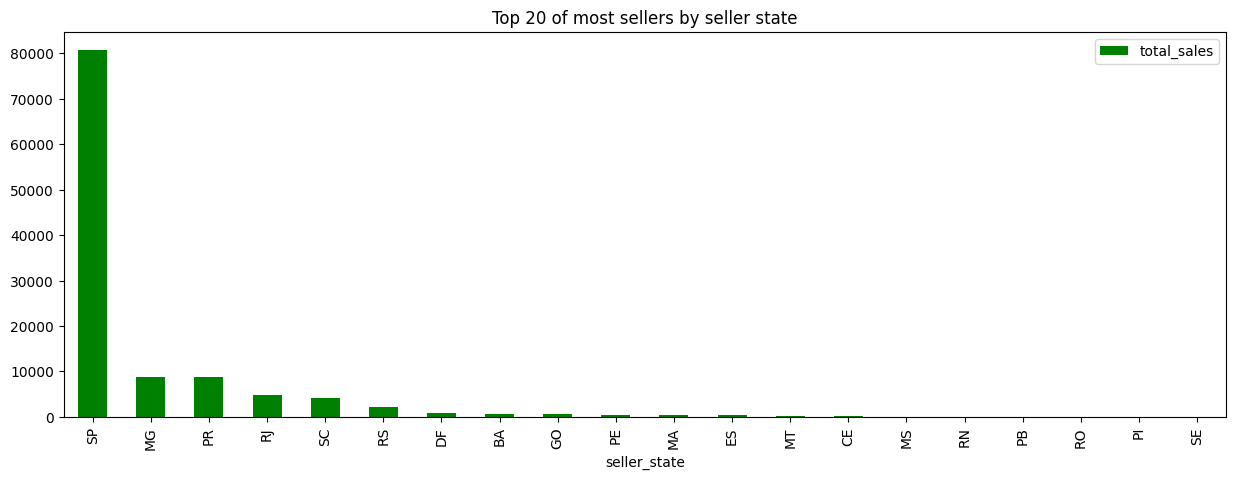

In [519]:
df_most_sellers_by_seller_state.head(20).plot.bar(
    color=["green"],
    y=["total_sales"],
    title="Top 20 of most sellers by seller state",
    figsize=(15, 5)
    )

Top 20 of most purchases by customer state

<Axes: title={'center': 'Top 20 of most purchases by customer state'}, ylabel='customer_state'>

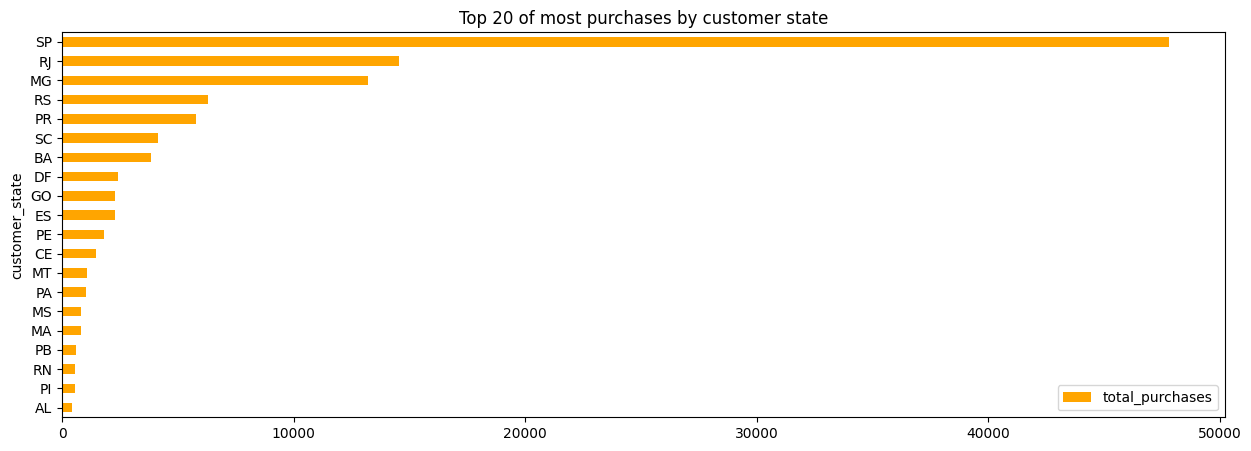

In [520]:
df_most_purchases_by_customer_state.head(20).sort_values(by="total_purchases").plot.barh(
    color=["orange"],
    y=["total_purchases"],
    title="Top 20 of most purchases by customer state",
    figsize=(15, 5)
    )

Top 15 average of most expensive freight by customer state



<Axes: title={'center': 'Top 15 average of most expensive freight by customer state'}, xlabel='customer_state', ylabel='avg_freight_value'>

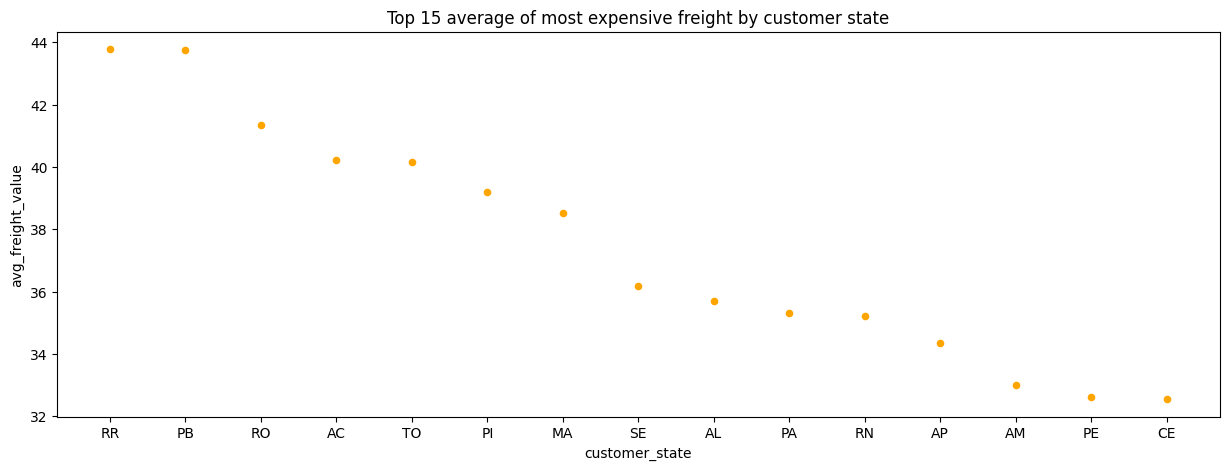

In [521]:
df_avg_most_expensive_freight_by_customer.head(15).reset_index().plot.scatter(
    x="customer_state",
    y="avg_freight_value",
    color="orange",
    title="Top 15 average of most expensive freight by customer state",
    figsize=(15, 5)
    )

Top 7 average of most days to delivered by customer state

<Axes: title={'center': 'Top 7 average of most days to delivered by customer state'}, xlabel='customer_state'>

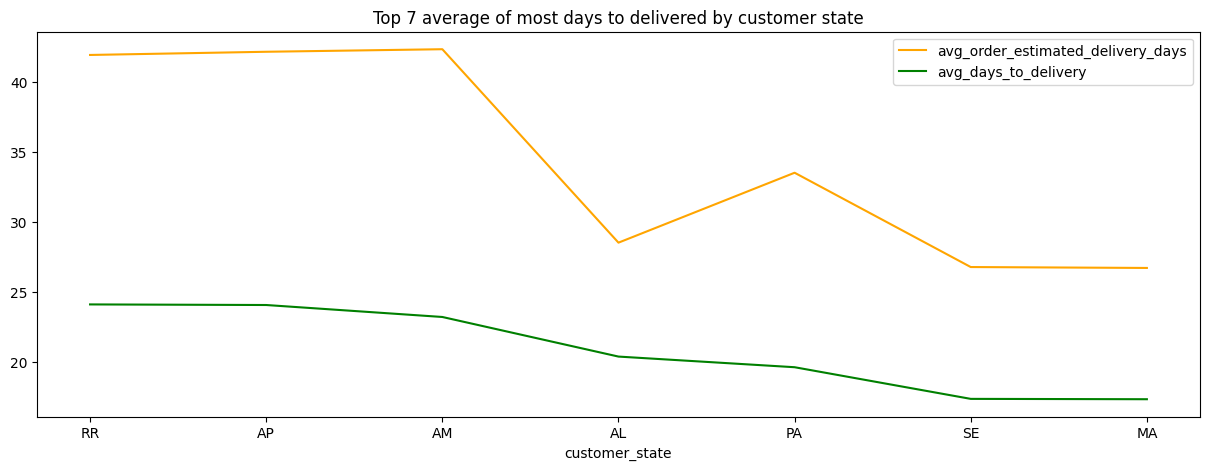

In [522]:
df_avg_most_days_to_delivered_by_customer_state.head(7)[["avg_order_estimated_delivery_days", "avg_days_to_delivery"]].plot(
    color=["orange", "green"],
    title="Top 7 average of most days to delivered by customer state",
    figsize=(15, 5)
    )

Top 20 average of most days diff estimated to delivered by customer state

<Axes: title={'center': 'Top 20 average of most days diff estimated to delivered by customer state'}, xlabel='customer_state'>

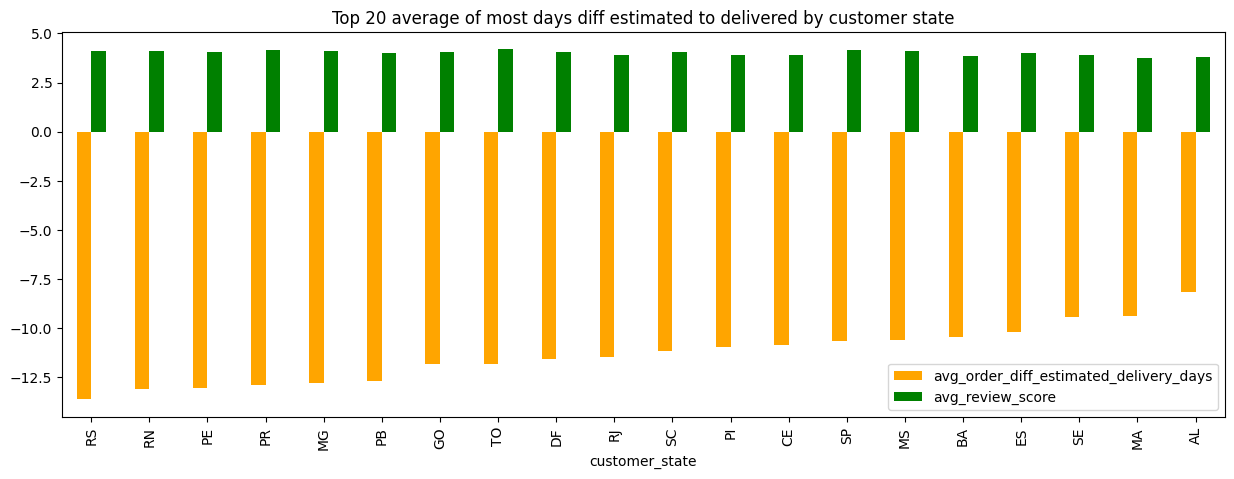

In [531]:
df_most_days_diff_estimated_to_delivered_by_customer_state.head(20).sort_values(by="avg_order_diff_estimated_delivery_days").plot.bar(
    y=["avg_order_diff_estimated_delivery_days", "avg_review_score"],
    title="Top 20 average of most days diff estimated to delivered by customer state",
    color=["orange", "green"],
    figsize=(15, 5)
    )

Top 7 most sales product category



<Axes: title={'center': 'Top 7 most sales product category'}, xlabel='product_category_name'>

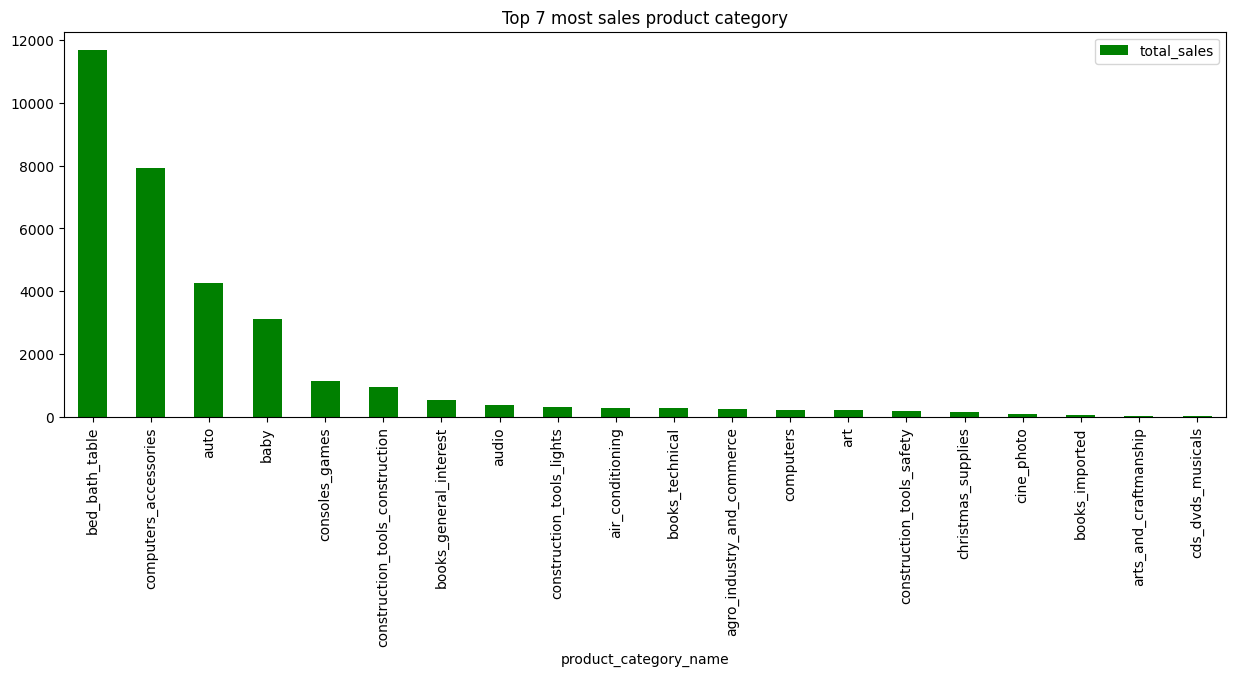

In [524]:
df_most_sales_products.groupby("product_category_name").agg({"total_sales": "sum"}).head(20).sort_values(
    by="total_sales",
    ascending=False
    ).reset_index().plot.bar(
        x="product_category_name",
        y="total_sales",
        color="green",
        figsize=(15, 5),
        title="Top 7 most sales product category"
        )

Top 7 most product cateogry score



<Axes: title={'center': 'Top 7 most product cateogry score'}, xlabel='product_category_name'>

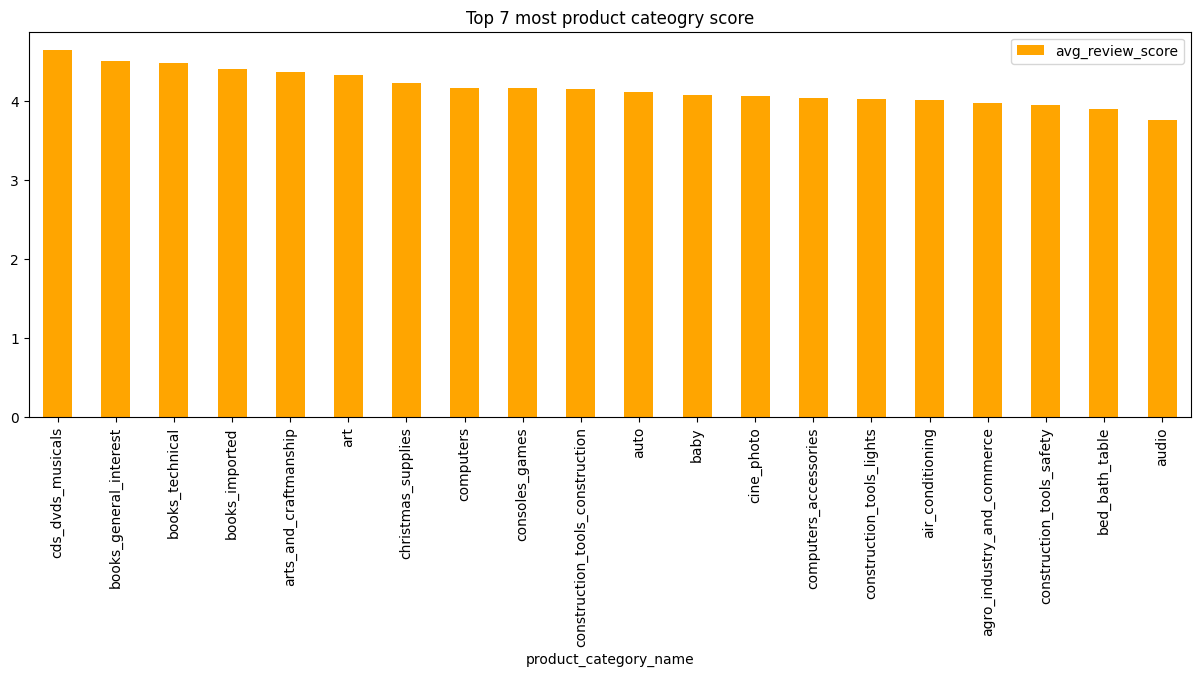

In [525]:
df_most_product_score.groupby("product_category_name").agg({"avg_review_score": "mean"}).head(20).sort_values(
    by="avg_review_score",
    ascending=False
    ).reset_index().plot.bar(
      x="product_category_name",
      y="avg_review_score",
      color="orange",
      title="Top 7 most product cateogry score",
      figsize=(15, 5)
)